In [2]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import (
    PolynomialFeatures,
    OneHotEncoder
)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')



In [3]:
train_test2 = pd.read_csv('../../data/daily_sunspots_time_series_1850-01_2024-05.csv')

In [4]:
train_test2

,date,year,month,day,date_frac,counts,std,nobs,indicator
0,1850-01-01,1850,1,1,1850.001,253,19.6,1,NaN
1,1850-01-02,1850,1,2,1850.004,162,15.5,1,NaN
2,1850-01-03,1850,1,3,1850.007,217,18.1,1,NaN
3,1850-01-04,1850,1,4,1850.010,99,12.0,1,NaN
4,1850-01-05,1850,1,5,1850.012,108,12.6,1,NaN
...,...,...,...,...,...,...,...,...,...
63668,2024-04-26,2024,4,26,2024.318,141,29.9,30,*
63669,2024-04-27,2024,4,27,2024.321,139,25.9,29,*
63670,2024-04-28,2024,4,28,2024.324,119,22.0,25,*
63671,2024-04-29,2024,4,29,2024.327,100,15.3,38,*


In [5]:
train_test2 = train_test2[['date','day','month','year','counts']]

In [6]:
train_test2

,date,day,month,year,counts
0,1850-01-01,1,1,1850,253
1,1850-01-02,2,1,1850,162
2,1850-01-03,3,1,1850,217
3,1850-01-04,4,1,1850,99
4,1850-01-05,5,1,1850,108
...,...,...,...,...,...
63668,2024-04-26,26,4,2024,141
63669,2024-04-27,27,4,2024,139
63670,2024-04-28,28,4,2024,119
63671,2024-04-29,29,4,2024,100


In [7]:
11*365

4015

In [29]:
# !pip install prophet

  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.0 MB/s eta 0:00:00
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)


In [30]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [38]:
df_prophet = train_test2[['date','counts']]



df_prophet.describe()

,counts
count,63673.000000
mean,83.410174
std,76.875804
min,0.000000
25%,21.000000
50%,64.000000
75%,128.000000
max,528.000000


In [44]:
df_prophet = df_prophet.set_index(df_prophet['date'])
df_prophet


,date,counts
date,,
1850-01-01,1850-01-01,253
1850-01-02,1850-01-02,162
1850-01-03,1850-01-03,217
1850-01-04,1850-01-04,99
1850-01-05,1850-01-05,108
...,...,...
2024-04-26,2024-04-26,141
2024-04-27,2024-04-27,139
2024-04-28,2024-04-28,119


In [45]:
df_prophet.drop('date', axis=1)

,counts
date,
1850-01-01,253
1850-01-02,162
1850-01-03,217
1850-01-04,99
1850-01-05,108
...,...
2024-04-26,141
2024-04-27,139
2024-04-28,119


In [50]:
df_prophet = df_prophet.rename(columns={'date': 'ds', 'counts': 'y'})
df_prophet

,ds,y
date,,
1850-01-01,1850-01-01,253
1850-01-02,1850-01-02,162
1850-01-03,1850-01-03,217
1850-01-04,1850-01-04,99
1850-01-05,1850-01-05,108
...,...,...
2024-04-26,2024-04-26,141
2024-04-27,2024-04-27,139
2024-04-28,2024-04-28,119


In [51]:
m = Prophet()
m.fit(df_prophet)

23:03:33 - cmdstanpy - INFO - Chain [1] start processing
23:03:57 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
# Python
future = m.make_future_dataframe(periods=11*365)
future.tail()

,ds
67683,2035-04-24
67684,2035-04-25
67685,2035-04-26
67686,2035-04-27
67687,2035-04-28


In [62]:
df_prophet
m
future

,ds
0,1850-01-01
1,1850-01-02
2,1850-01-03
3,1850-01-04
4,1850-01-05
...,...
67683,2035-04-24
67684,2035-04-25
67685,2035-04-26
67686,2035-04-27


In [63]:

# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
67683,2035-04-24,12.365997,-207.685912,259.086919
67684,2035-04-25,12.562363,-210.741135,272.839867
67685,2035-04-26,12.952604,-225.524764,260.827362
67686,2035-04-27,12.824210,-217.372154,248.779644
67687,2035-04-28,12.733468,-230.652487,260.686598


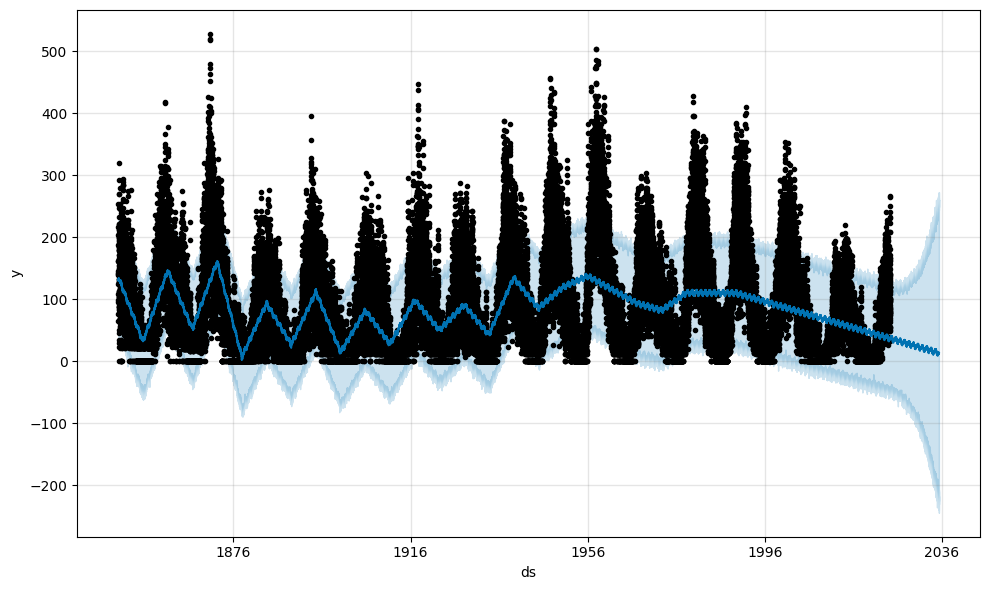

In [64]:
fig1 = m.plot(forecast)


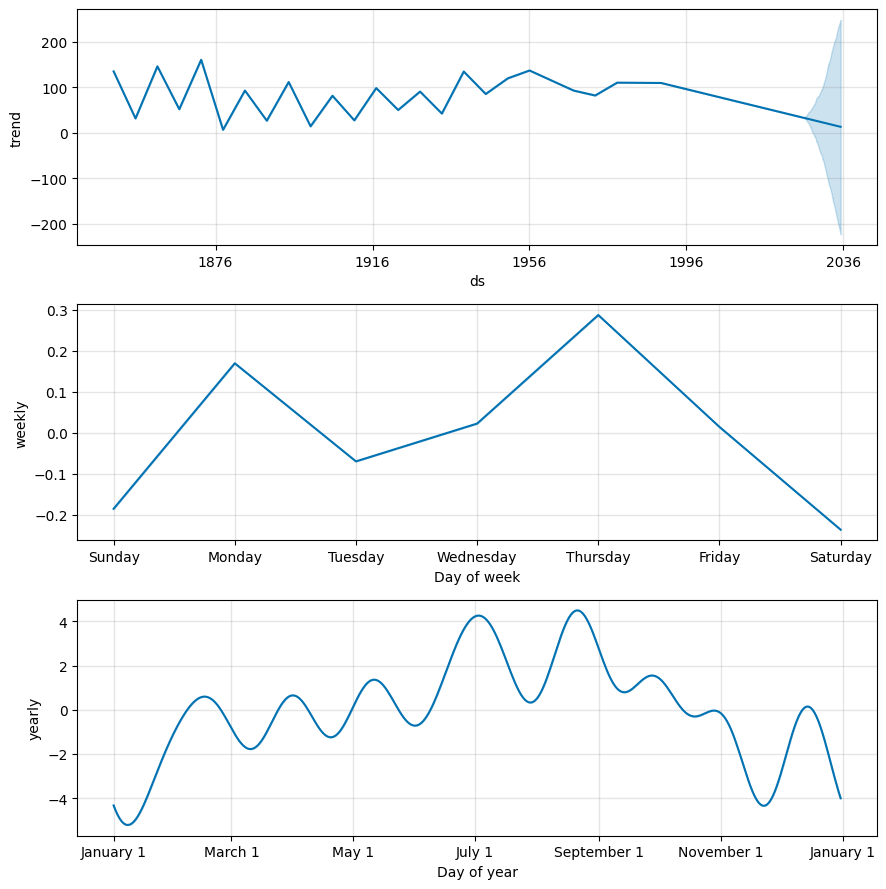

In [65]:
fig2 = m.plot_components(forecast)
